In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [4]:
#Standard loading of my dataframe...
target = (r'C:\Users\Erin\BirthNamesData')
filelist=os.listdir(target)
os.chdir(target)
df_list = pd.DataFrame()
for file in filelist:
    foo = pd.read_table(file, header=None, names=['Name','Gender','Count', 'Year'], sep=",")
    foo['Year']=file
    df_list = df_list.append(foo)
df_list['Year'] = df_list['Year'].map(lambda x: x.lstrip('yob').rstrip('.txt'))

Today I'm looking at totals. 

In [56]:
yearly_tots=df_list.groupby('Year').sum()

In [10]:
yearly_tots.head()

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467


In [11]:
yearly_tots.tail()

,Count
Year,
2010,3686589
2011,3646730
2012,3643336
2013,3626802
2014,3670151


So quite a few more births recorded by the SSA in modern years than in 1880. 10-15 times more. However, the population of the US, according to the 1880 census, was 50,189,209 (source: https://www.census.gov/history/www/through_the_decades/fast_facts/1880_fast_facts.html), while the US population in 2010 was 308,745,538 (source: https://www.census.gov/history/www/through_the_decades/fast_facts/2010_fast_facts.html) - only a six-fold increase. Unless the birth rate is now twice as high as it was 125 years ago (spoiler: it's not), there's some inconsistencies in the data. 

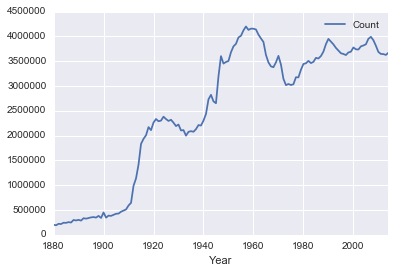

In [13]:
yearly_tots.plot()

Let's see what the total US population looks like for this time period... Numbers come from the www.census.gov site. 

In [158]:
us_pop = pd.DataFrame({'Year':['1880','1890','1900','1910','1920','1930','1940','1950','1960','1970','1980','1990','2000','2010'],
                       'Pop':[50189209,62979766,76212168,92228496,106021537,123202624,132164569,151325798,179323175,203302031,226542199,
                              248709873,281421906,308745538]},
                      )

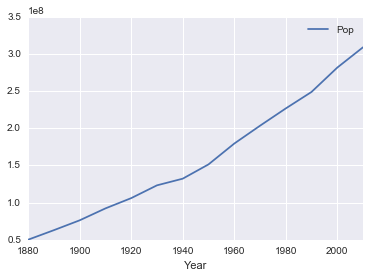

In [159]:
us_pop.plot(x='Year',y='Pop')

What a nice near-linear graph! Now let's see what the two graphs look like combined: 

In [160]:
us_pop.set_index('Year', inplace=True)

In [161]:
us_pop.reset_index()

,Year,Pop
0,1880,50189209
1,1890,62979766
2,1900,76212168
3,1910,92228496
4,1920,106021537
5,1930,123202624
6,1940,132164569
7,1950,151325798
8,1960,179323175
9,1970,203302031


#pop_dict=us_pop.to_dict()
pop_dict={'1880': 50189209,
  '1890': 62979766,
  '1900': 76212168,
  '1910': 92228496,
  '1920': 106021537,
  '1930': 123202624,
  '1940': 132164569,
  '1950': 151325798,
  '1960': 179323175,
  '1970': 203302031,
  '1980': 226542199,
  '1990': 248709873,
  '2000': 281421906,
  '2010': 308745538}

In [162]:
yearly_tots.reset_index()

,Year,Count
0,1880,201484
1,1881,192699
2,1882,221538
3,1883,216950
4,1884,243467
5,1885,240855
6,1886,255319
7,1887,247396
8,1888,299480
9,1889,288950


In [176]:
two_pops=yearly_tots.join(us_pop)
two_pops=two_pops.dropna()
two_pops

,Count,Pop
Year,,
1880,201484,50189209.0
1890,301402,62979766.0
1900,450327,76212168.0
1910,590719,92228496.0
1920,2262746,106021537.0
1930,2222937,123202624.0
1940,2302225,132164569.0
1950,3503853,151325798.0
1960,4154810,179323175.0


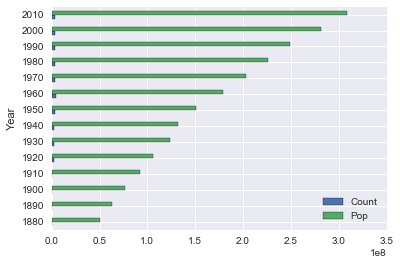

In [181]:
two_pops.plot.barh()

Not super helpful, this graph. Let's try plotting the percentage of births in the total population: 

In [182]:
def rto(babies,total):
    return (babies/total)*100
two_pops['Ratio']=rto(two_pops['Count'],two_pops['Pop'])
two_pops

,Count,Pop,Ratio
Year,,,
1880,201484,50189209.0,0.401449
1890,301402,62979766.0,0.478570
1900,450327,76212168.0,0.590886
1910,590719,92228496.0,0.640495
1920,2262746,106021537.0,2.134232
1930,2222937,123202624.0,1.804294
1940,2302225,132164569.0,1.741938
1950,3503853,151325798.0,2.315437
1960,4154810,179323175.0,2.316940


In [188]:
births_ratio = two_pops.drop(['Count','Pop'], axis=1)

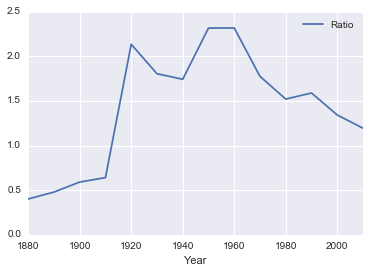

In [189]:
births_ratio.plot()

Hmm, this graph looks a little familiar... 

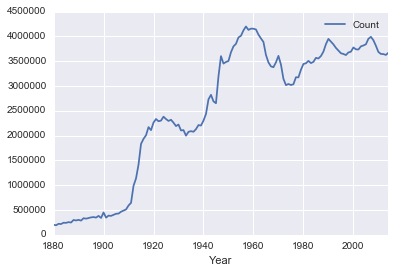

In [190]:
yearly_tots.plot()

But back to the births_ratio graph. This isn't exactly a graph of the birth rate, since the birth rate is generally calculated using only the population that can, y'know, give birth. But if we assume that the ratio of women aged 15-44 to the general population is relatively constant over the years (see note), then a graph of the birth rate would have a similar shape to it. And it seems intuitive to me that the birth rate now (62.7 births per 1000 women aged 15-44 for the year ending June 2013, according to http://www.cdc.gov/nchs/data/hestat/births_fertility_june_2013/births_june_2013.htm) should be lower than it's previously been, due to the prevalence and effectiveness of birth control. 

Note: I don't believe that's a fair assumption. Death in childbirth for women of childbearing age was quite a bit higher historically than it is now, which would decrease somewhat the childbearing women:general population ratio. Not enough to explain the very low entries in the 1880-1920 data though. 